In [ ]:
# Import library
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product
import missingno

# Preprocessing Data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# load dataset
df = pd.read_csv('CC GENERAL.csv')


# We convert name of feature to lower font
df.columns = map(str.lower, df.columns)
df.head()


,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,hier_class
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,0.158324
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331,0.372039
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000,0.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,2.000000


In [ ]:
df.count()

cust_id                             8950
balance                             8950
balance_frequency                   8950
purchases                           8950
oneoff_purchases                    8950
installments_purchases              8950
cash_advance                        8950
purchases_frequency                 8950
oneoff_purchases_frequency          8950
purchases_installments_frequency    8950
cash_advance_frequency              8950
cash_advance_trx                    8950
purchases_trx                       8950
credit_limit                        8949
payments                            8950
minimum_payments                    8637
prc_full_payment                    8950
tenure                              8950
dtype: int64

We can see that 'credit_limit' and 'minimum_payments' are the features with NaN values.
Total Number of customers - 8950

In [ ]:
# Since customer id is not significant feature, it is dropped.
df_new = df.drop('cust_id', axis=1)
df_new.head()



,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  


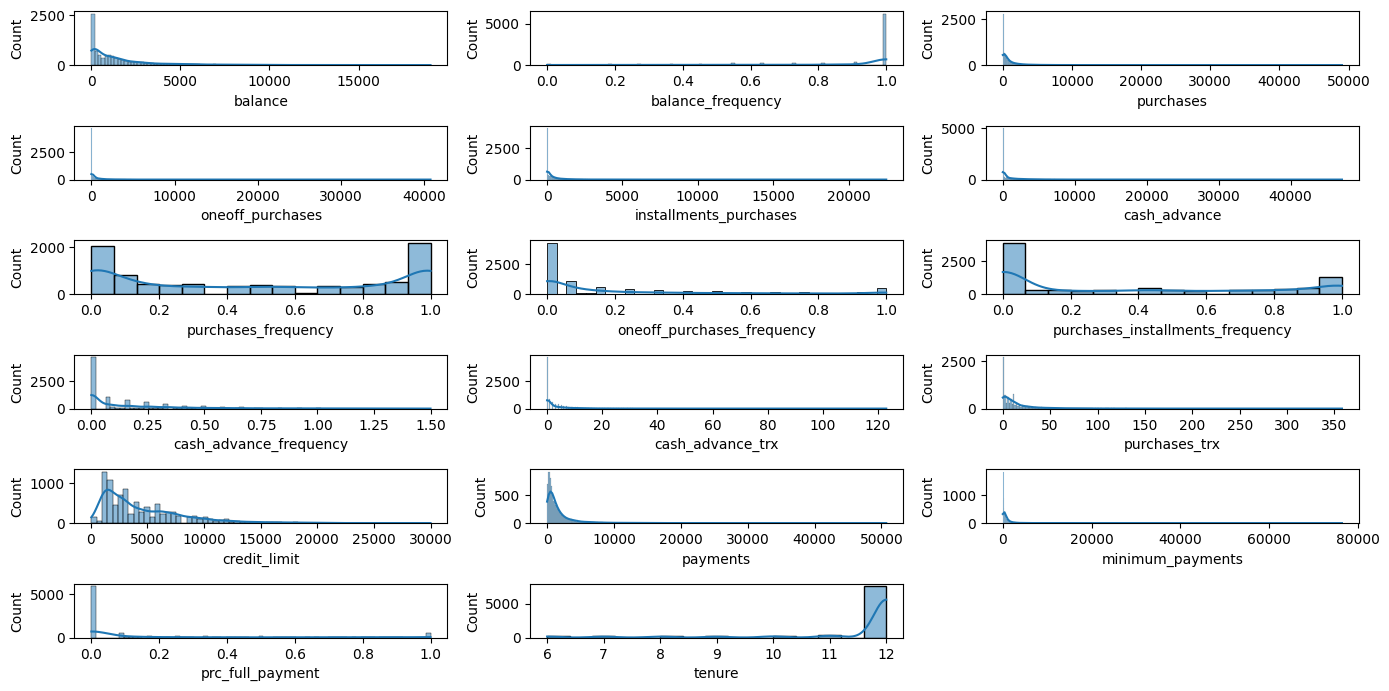

In [ ]:
# Univariate Analysis to check distribution of features 
fig = plt.figure(dpi=100,figsize=(14,7), constrained_layout=True)
for i in range(len(df_new.columns)):
    plt.subplot(6, 3, i+1)
    sns.histplot(df_new[df_new.columns[i]], kde=True)
fig.tight_layout()


** *italicised text*UNIVARIATE ANALYSIS RESULTS**

1.   Features like *balance*, *purchases*, *oneoff_purchases*, *installment_purchases* and *cash_advance* show similar trend.
2.   For around 6000 customers, the balance frequency are frequently updated.
3.   The purchases are being made frequenlty by around 2000 customers. Also the purchase frequency can be categorised into 2 categories - one who frequenlty purchases and those who rarely purchases.
4.   There were more customers who made purchases using installments rather than one-go purchases.
5.   Majority of credit limit for a user falls between 0 and 15000.
6.   Around 5% of users have made full payment while around 6000 customers still haven't made any payment/installment.
7.   Around 80% of customers have credit card tenure service in 12th month.
8.   The balances of 95% of users are between 0 and 5000.


**BIVARIATE ANALYSIS**

In [ ]:

# Correlation between Continuous variables
df_new[['balance','balance_frequency','purchases','oneoff_purchases','installments_purchases','cash_advance','purchases_frequency','oneoff_purchases_frequency','purchases_installments_frequency','cash_advance_frequency','cash_advance_trx','purchases_trx','credit_limit','payments','minimum_payments','prc_full_payment']].corr()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment
balance,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959
balance_frequency,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082
purchases,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379
oneoff_purchases,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763
installments_purchases,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569
cash_advance,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935
purchases_frequency,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802
oneoff_purchases_frequency,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531
purchases_installments_frequency,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087
cash_advance_frequency,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773


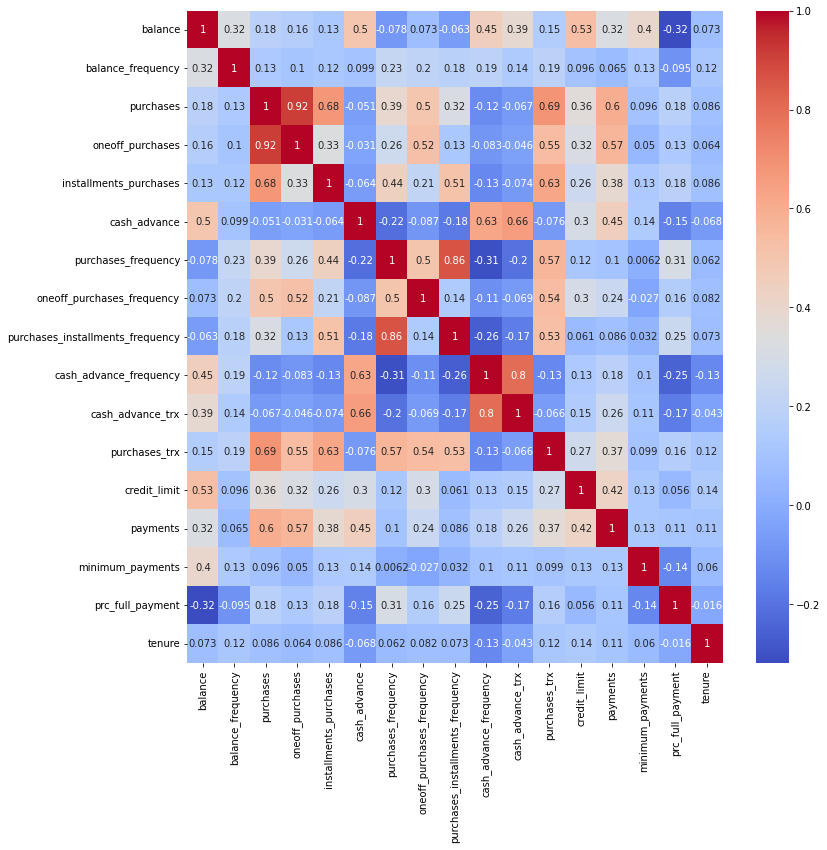

In [ ]:
plt.figure(figsize = (12, 12))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', 
            xticklabels=df_new.columns,
            yticklabels=df_new.columns)



**Correlation Analysis:**
We can see almost perfect positive correlation between following features:
*   Purchases and One-off purchases
*   Cash Advance Frequency and Cash advance transactions
*   Purchase frequency and purchase installments frequency

Medium Correlation between:


*   Purchases and Installments purchases
*   Purchases and Purchase Transactions
*   Purchases and Payments
*   Cash Advance and Cash Advance Transactions / Cash Advance Frequency






In [ ]:
# Describe function to check each feature in detail
df_new.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Checking missing value in each feature
df_new.isna().sum()


balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [ ]:
# Replacing missing value for median
df_new['credit_limit'].fillna(df_new['credit_limit'].median(), inplace = True)
df_new['minimum_payments'].fillna(df_new['minimum_payments'].median(), inplace = True)

In [ ]:
# Checking if there is null value
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  credit

In [ ]:
# Checking for duplicates
df_new[df_new.duplicated()]


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure


**OUTLIER DETECTION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

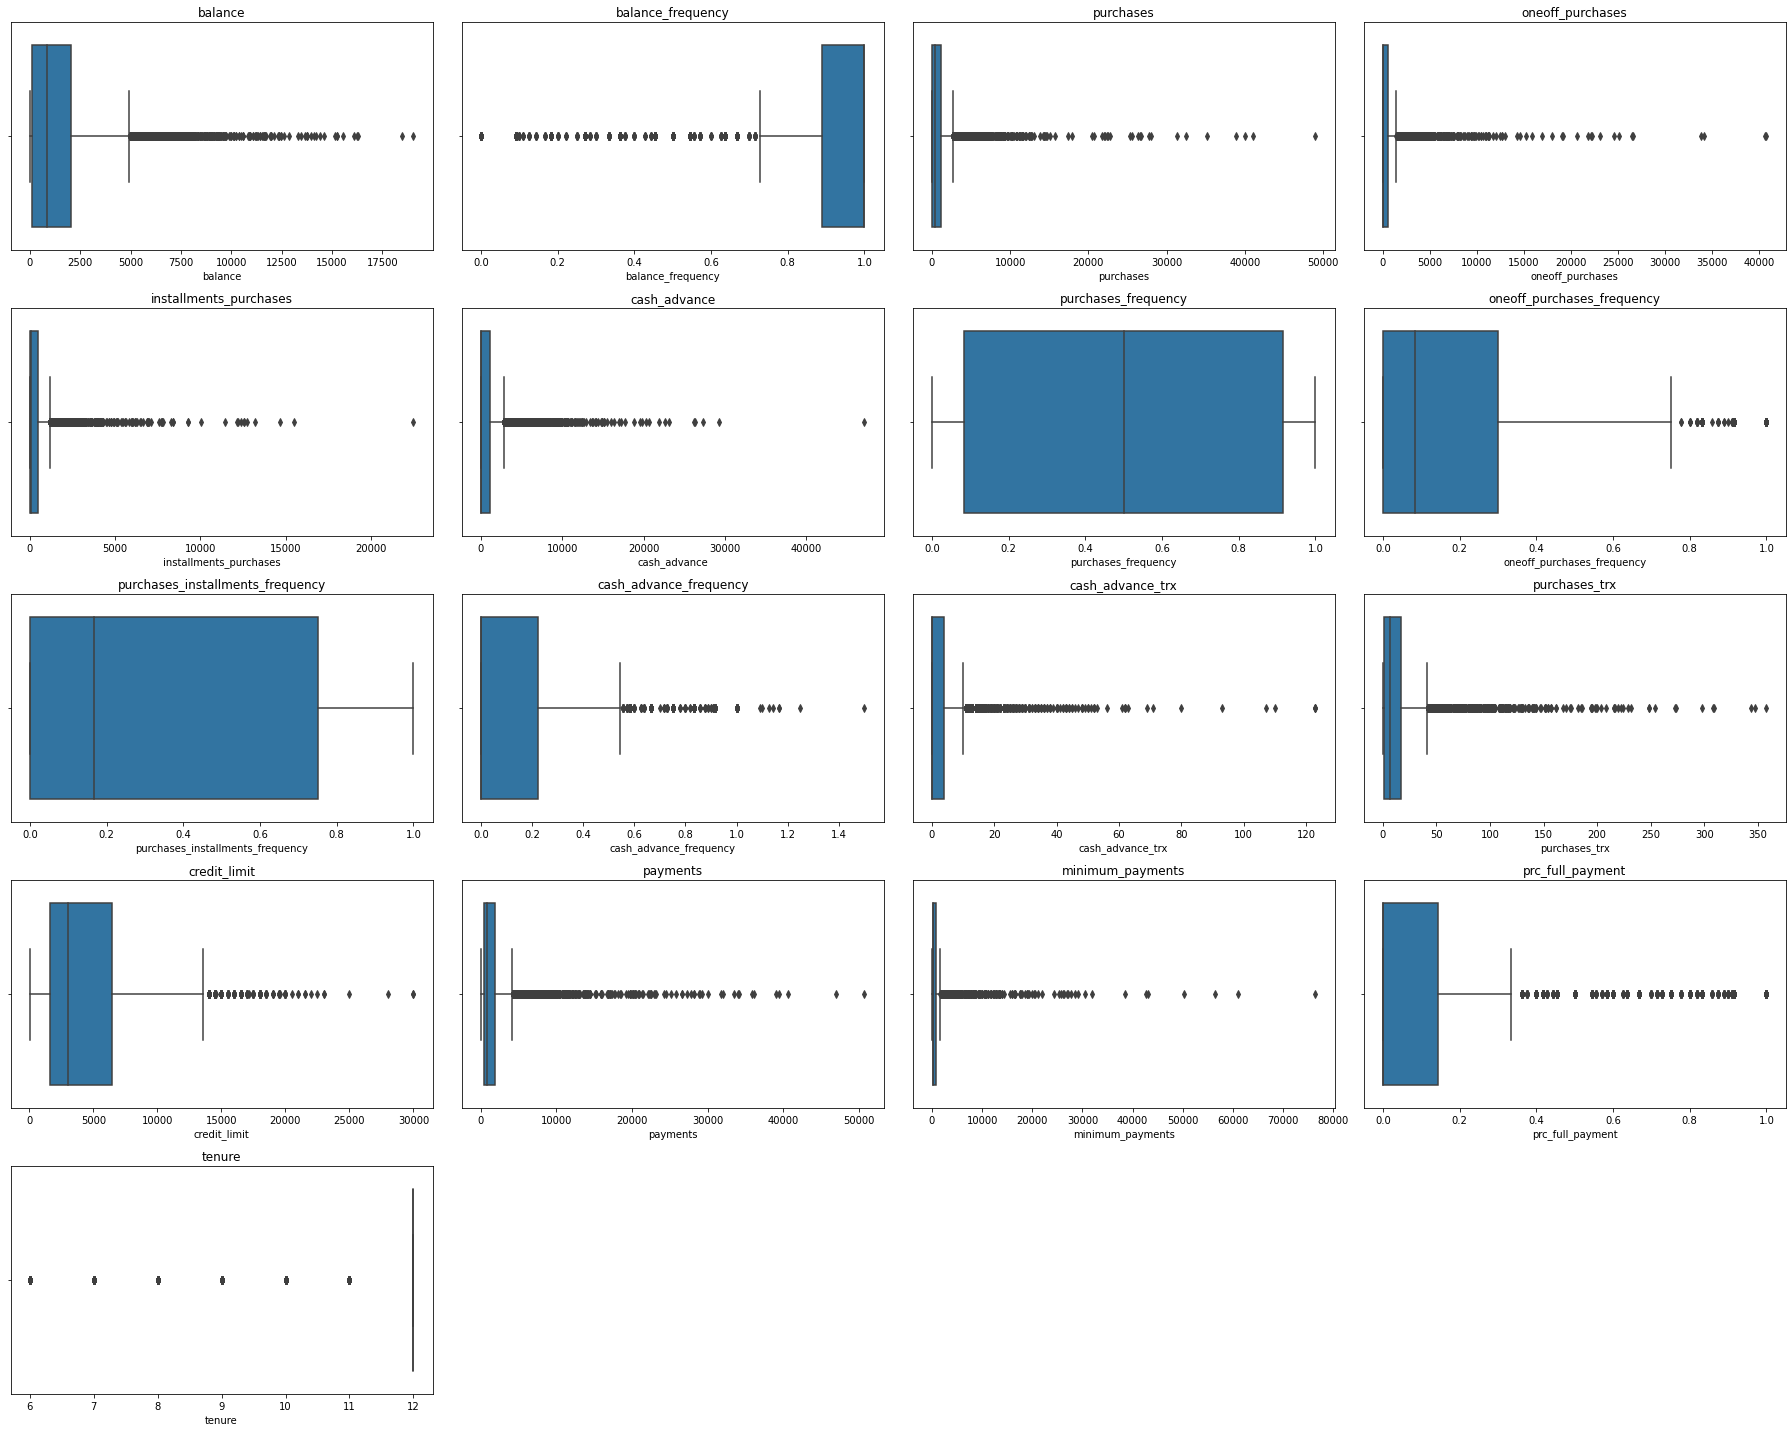

In [ ]:
# Outlier detection using box plot
plt.figure(figsize=(25,20))
for i in range(len(df_new.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df_new[df_new.columns[i]])
    plt.title(df_new.columns[i])
    
plt.tight_layout()


In [ ]:
#handling outlier, normal distribution, skewness
data_sqrt = np.sqrt(df_new)


In [ ]:
data_sqrt.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,6.395369,0.904534,9.767292,0.000000,9.767292,0.000000,0.408249,0.000000,0.288675,0.000000,0.0,1.414214,31.622777,14.205706,11.811426,0.000000,3.464102
1,56.590347,0.953463,0.000000,0.000000,0.000000,80.267961,0.000000,0.000000,0.000000,0.500000,2.0,0.000000,83.666003,64.054919,32.746606,0.471404,3.464102
2,49.951465,1.000000,27.805935,27.805935,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,3.464102,86.602540,24.941266,25.045654,0.000000,3.464102
3,40.824877,0.797724,38.716921,38.716921,0.000000,14.345313,0.288675,0.288675,0.000000,0.288675,1.0,1.000000,86.602540,0.000000,17.673255,0.000000,3.464102
4,28.595705,1.000000,4.000000,4.000000,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.0,1.000000,34.641016,26.044861,15.645806,0.000000,3.464102


In [ ]:
# Modeling
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
#running PCA with full components
pca_all = PCA(n_components=len(data_sqrt.columns), random_state = 2022)
pca_all.fit(data_sqrt)
variance = pca_all.explained_variance_ratio_
var = np.cumsum(variance)*100

#plot for information extracted
fig = px.line(x=np.arange(len(data_sqrt.columns))+1, y=var, markers=True)
fig.update_xaxes(title_text='# of Features')
fig.update_yaxes(title_text='% Variance Explained')
fig.update_layout(width=900)


In [ ]:
#total information extracted after pca
print('information extracted {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))

information extracted 68.69903059958153 %


In [ ]:
pca_n = PCA(n_components = 2, random_state = 2022) 
X_principal1 = pca_n.fit_transform(data_sqrt)
X_principal1 = pd.DataFrame(X_principal1) 
X_principal1.columns = ['C1', 'C2'] 



In [ ]:
X_principal1.describe()

,C1,C2
count,8.950000e+03,8.950000e+03
mean,1.625912e-15,1.905366e-16
std,3.947789e+01,3.229625e+01
min,-6.722508e+01,-1.314112e+02
25%,-2.909550e+01,-2.296459e+01
50%,-8.526219e+00,4.789742e+00
75%,2.095477e+01,1.928853e+01
max,2.954202e+02,1.978769e+02


In [ ]:
from scipy.stats import skew,kurtosis

In [ ]:
print(kurtosis(X_principal1))

[2.83857589 1.18597758]


In [ ]:
print(skew(X_principal1))

[1.3008584  0.14430738]


**K-MEANS**

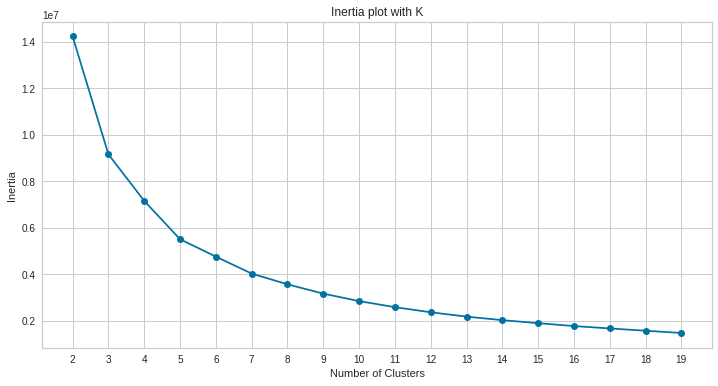

In [ ]:
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()
inertia_plot(KMeans, X_principal1)

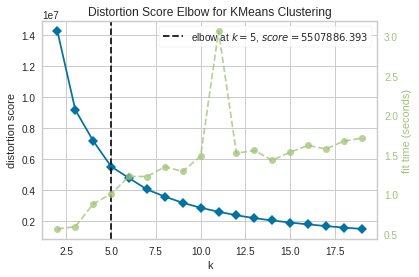

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2,20))
elb_visualizer.fit(X_principal1)    
elb_visualizer.show()  

Using elbow method, we can see that our K = 5

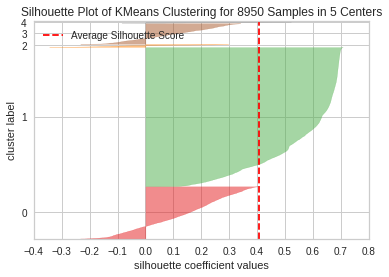

In [ ]:
model_4clust = KMeans(n_clusters = 5, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(df_new)    
sil_visualizer.show()

In [ ]:
km = KMeans(n_clusters=5,init="k-means++",n_init=10,max_iter=300)
##Init is a sheet argument,max_iter is the max times to update the sheet
km.fit(X_principal1)
cluster_labels = km.predict(X_principal1)

In [ ]:
cluster_labels

array([4, 1, 0, ..., 4, 4, 4], dtype=int32)

Text(0.5, 1.0, 'Customer Data')

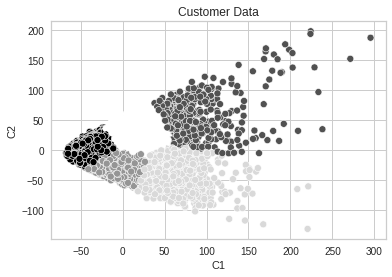

In [ ]:
# visualising k-means results
sns.scatterplot(x='C1', 
                y='C2', 
                data=X_principal1, 
                c=km.labels_).set_title('Customer Data')

**AGGLOMERATIVE CLUSTERING**

In [ ]:
# Davies Bouldin Score to find optimal number of clusters for ward linkage
results = {}
for i in range(2,15):
    hier = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None,n_clusters=i)
    hlabels = hier.fit_predict(X_principal1)
    db_index = davies_bouldin_score(X_principal1, hlabels)
    results.update({i: db_index})

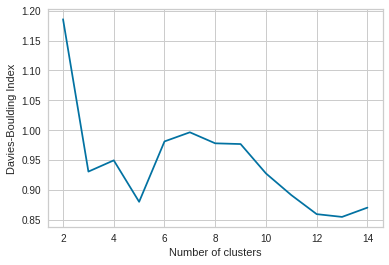

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Bouldin Index")
plt.show()

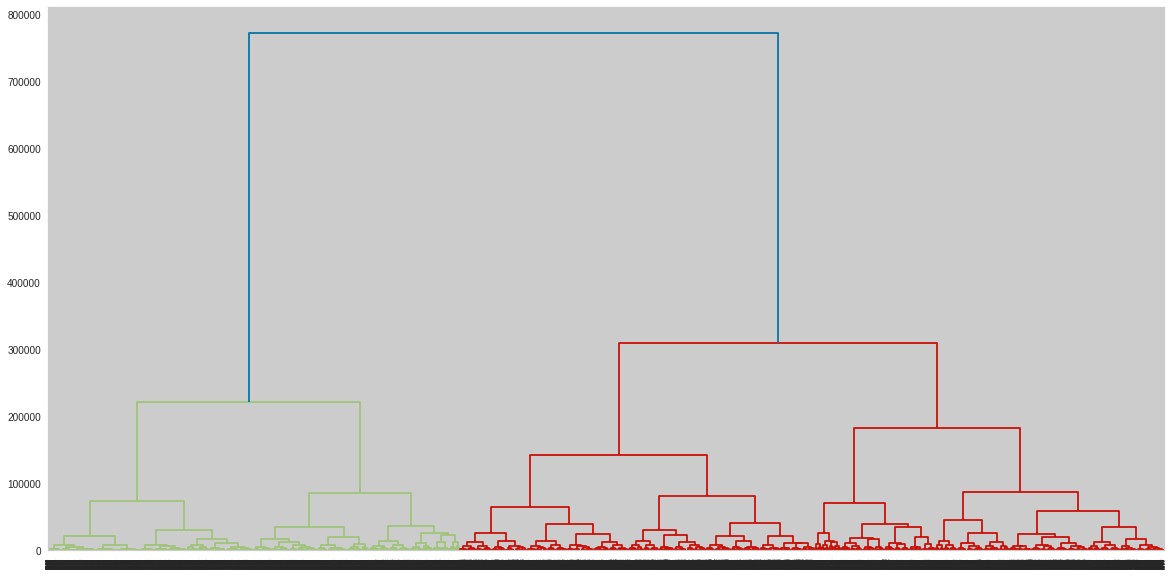

In [ ]:
# Using Dendrogram to find number of clusters
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
Z = hierarchy.linkage(hier.children_, 'ward')
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

Our aim is to find optimal value in which clusters are less dispersed internally and are farther apart from each other. Hence a lower value of DB index will mean that our clustering is better.
So based on this, we choose K = 5

In [ ]:
#using ward linkage
hier_model = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None,n_clusters=5)
hier = hier_model.fit_predict(X_principal1)

In [ ]:
# Davies Bouldin Score to find optimal number of clusters for complete linkage
results = {}
for i in range(2,15):
    hier_complete = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,n_clusters=i)
    hlabels = hier_complete.fit_predict(X_principal1)
    db_index = davies_bouldin_score(X_principal1, hlabels)
    results.update({i: db_index})

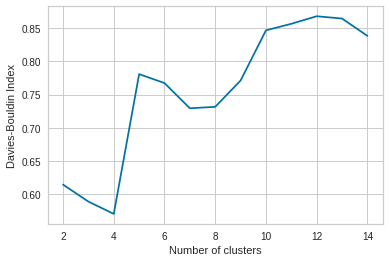

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Bouldin Index")
plt.show()

In [ ]:
#using complete linkage
hier_model1 = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,n_clusters=4)
hier1 = hier_model1.fit_predict(X_principal1)

In [ ]:
hier1

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Customer Data')

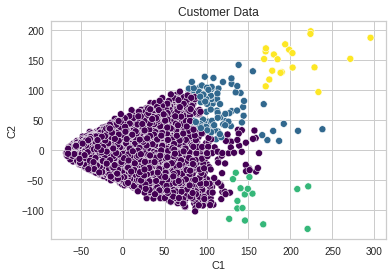

In [ ]:
# visualizing clusters using complete linkage

sns.scatterplot(x='C1', 
                y='C2', 
                data=X_principal1, 
                c=hier_model1.labels_,cmap='viridis').set_title('Customer Data')


In [ ]:

hier

array([4, 2, 1, ..., 4, 4, 4])

Text(0.5, 1.0, 'Customer Data')

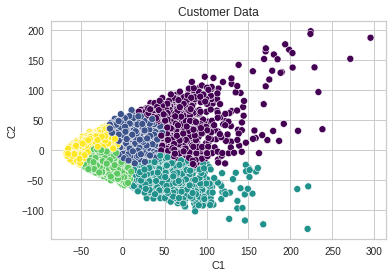

In [ ]:
# visualizing clusters using ward linkage
sns.scatterplot(x='C1', 
                y='C2', 
                data=X_principal1, 
                c=hier_model.labels_, cmap='viridis').set_title('Customer Data')

**HDBSCAN**

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340713 sha256=6267eb20c38e9b992c32361463ef717ddbbfb8817044ab154d7b1dcb47bf6850
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
# Silhoutte score to calculate optimal clusters for the HDBSCAN
clusters=[15,20,30,40,50,60]
samples=[5,10,15]
cluster_df=[]
sample_df=[]
sil_score_hdbscan=[]
for sample in samples :
    for cluster in clusters :
        sample_df.append(sample)
        cluster_df.append(cluster)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=cluster ,min_samples=sample,approx_min_span_tree=True,gen_min_span_tree=True)
        hdb_labels = clusterer.fit_predict(X_principal1)
        score = silhouette_score(X_principal1,hdb_labels)
        sil_score_hdbscan.append(score)


In [ ]:
dict ={'min_cluster_size':cluster_df,'min_samples':sample_df,'SILHOUETTE SCORE':sil_score_hdbscan}


In [ ]:
df_hdbscan=pd.DataFrame(dict)


In [ ]:
df_hdbscan.sort_values('SILHOUETTE SCORE',ascending=False)


,min_cluster_size,min_samples,SILHOUETTE SCORE
6,15,10,0.363515
13,20,15,0.282685
11,60,10,0.274484
3,40,5,0.266352
4,50,5,0.109850
5,60,5,0.109850
16,50,15,0.063609
15,40,15,0.063609
9,40,10,0.038850
8,30,10,0.038850


Based on the high value of silhouette score, we determine the min_cluster_size = 15 and minimum_samples =10.

In [ ]:
hdbscan = hdbscan.HDBSCAN(min_cluster_size=15 ,min_samples=10,approx_min_span_tree=True,gen_min_span_tree=True)
hdbscan_labels = hdbscan.fit_predict(X_principal1)

In [ ]:
# unique labels of hdbscan
np.unique(hdbscan_labels)

array([-1,  0,  1])

Text(0.5, 1.0, 'Customer Data')

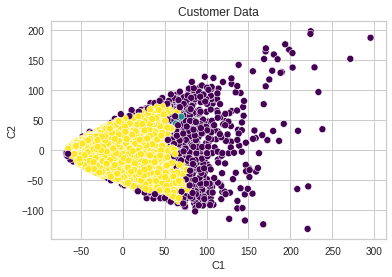

In [ ]:
# Visualizing our hdbscan model
sns.scatterplot(x='C1', 
                y='C2', 
                data=X_principal1, 
                c=hdbscan.labels_, cmap='viridis').set_title('Customer Data')

In [ ]:
# Combining cluster columns from each model into our dataset
X_principal1['kmeans']=cluster_labels
X_principal1['hier_ward'] = hier
X_principal1['hier_complete'] = hier1
X_principal1['hdbscan_cluster']= hdbscan_labels

In [ ]:
X_principal1.head()

,C1,C2,kmeans,hier,hdbscan_cluster,hier_ward,hier_complete
0,-52.679069,4.660530,4,4,1,4,0
1,44.150781,-63.756182,1,2,1,2,0
2,13.452254,8.591083,0,1,1,1,0
3,7.110526,12.249603,0,1,1,1,0
4,-36.904244,-6.436452,4,3,1,3,0


Calculating Silhouette score for each model and combining into a data frame

In [ ]:
kmeans_score = silhouette_score(X_principal1[['C1','C2']],X_principal1['kmeans'].to_numpy())

0.4046088111394685

In [ ]:
hdbscan_score = silhouette_score(X_principal1[['C1','C2']],X_principal1['hdbscan_cluster'].to_numpy())
hdbscan_score

0.3635154913082727

In [ ]:
hier_ward_score = silhouette_score(X_principal1[['C1','C2']],X_principal1['hier_ward'].to_numpy())
hier_ward_score

0.3584584094168891

In [ ]:
hier_complete = silhouette_score(X_principal1[['C1','C2']],X_principal1['hier_complete'].to_numpy())
hier_complete

0.5480655634982257

In [ ]:
score = {'kmeans': [0.40],
          'hdbscan': [0.36],
           'hier_ward': [0.36],
              'hier_complete':[0.55]
         }

best_model = pd.DataFrame(score)


In [ ]:
best_model

,kmeans,hdbscan,hier_ward,hier_complete
0,0.4,0.36,0.36,0.55


In [ ]:
df_new.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],
      dtype='object')

In [ ]:
df_new1 = pd.concat([X_principal, df_new[['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure']]], axis=1)


In [ ]:
df_new1.head()

,C1,C2,kmeans,hier,hdbscan_cluster,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,...,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-4324.002588,915.765369,0,2,6,40.900749,0.818182,95.40,0.00,95.4,...,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,4121.337598,-2437.924095,1,1,-1,3202.467416,0.909091,0.00,0.00,0.0,...,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,1499.292482,-2001.757145,3,1,0,2495.148862,1.000000,773.17,773.17,0.0,...,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1321.831643,-1387.720046,3,1,-1,1666.670542,0.636364,1499.00,1499.00,0.0,...,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,-3740.724727,751.733688,0,2,-1,817.714335,1.000000,16.00,16.00,0.0,...,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
need_columns = ['balance', 'purchases', 'minimum_payments', 'credit_limit', 'payments']
d={}
for i in need_columns:  
    d[i] = pd.DataFrame(df_new1.groupby('hier', axis = 0)[i].describe()[['mean', '50%', 'min', 'max']])

pd.concat(d, axis =1)


balance                                         purchases          \
             mean          50%       min           max         mean     50%   
hier                                                                          
0     5497.806008  5598.864288  1.019189  19043.138560  2703.381744  968.26   
1     1834.966093  1540.077454  0.000000   8315.894044  1119.485022  394.48   
2      598.240703   383.120468  0.000000   3308.148118   586.119257  308.19   

                    minimum_payments                                        \
      min       max             mean          50%        min           max   
hier                                                                         
0     0.0  49039.57      2656.546443  1599.353926  16.950090  76406.207520   
1     0.0  15704.04       973.114742   452.084802   0.037744  38512.124770   
2     0.0   5359.02       396.654240   210.847357   0.019163   8289.636536   

      credit_limit                               payments                    \
              mean      50%     min      max         mean          50%  min   
hier                                                                          
0     12359.290521  12000.0  4500.0  30000.0  5624.980569  3005.016513  0.0   
1      5777.932519   6000.0  1000.0  15000.0  1859.682668  1041.914403  0.0   
2      1902.524867   1500.0    50.0   6500.0   902.418928   551.093875  0.0   

                    
               max  
hier                
0     50721.483360  
1     22889.174680  
2      7842.362894

In [ ]:
hier_0 = df_new1[df_new1['hier'] == 0]
hier_1 = df_new1[df_new1['hier'] == 1]
hier_2 = df_new1[df_new1['hier'] == 2]

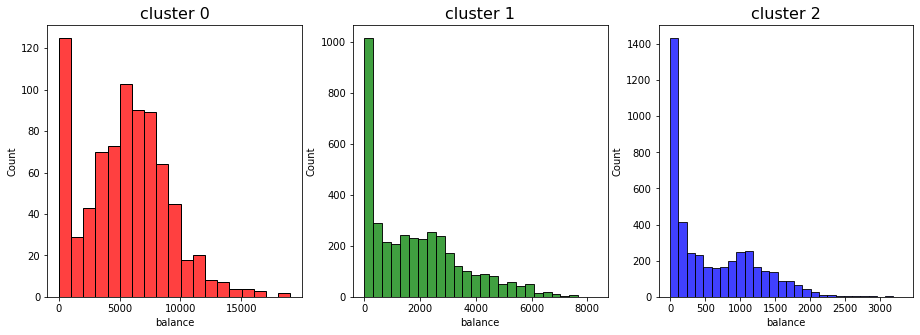

In [ ]:
#plot comparison balance from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(hier_0['balance'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(hier_1['balance'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(hier_2['balance'], color='blue')
plt.title('cluster 2', size = 16)
plt.show()


Text(0.5, 1.0, 'Customer Data')

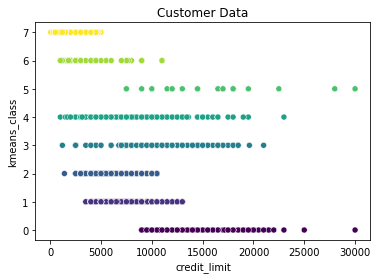

In [ ]:
sns.scatterplot(x='credit_limit', 
                y='kmeans_class', 
                data=df_new, 
                c=km.labels_).set_title('Customer Data')


In [ ]:
sns.pairplot(df_new, hue='kmeans_class', x_vars=['purchases', 'payments', 'credit_limit'],
            y_vars=hier_model1.labels_,
            height=5, aspect=1)
